### library imports

In [434]:
library(ggplot2)
library(lubridate)
library(forecast)
library(lmtest)
setwd("~/TS2024/data/Time Series Data/")
options(repr.plot.width = 16, repr.plot.height = 9)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




### 1번 문제

In [204]:
z = c(52, 46, 46, 52, 50, 50, 48, 45, 41, 53) ## data
t = 1:10 ## time

sum(z)

## (1), (2)
mean(z) ## 상수평균모형 적합

## (3)
sum((z - 48.3)^2)/9
qt(0.025, 9)
qt(0.025, 9)*sqrt(1.1*sum((z - 48.3)^2)/9) ## Lower bound

[1] 483

[1] 48.3

[1] 14.45556

[1] -2.262157

[1] -9.020623

### 2번 문제

In [210]:
z = c(303, 298, 303, 314, 303, 314, 310, 324, 317, 327, 323, 324, 331, 330, 332) ## data
t = 1:15 ## time

## (3)
sum(z)
sum(t*z)

beta1 = 12/3360*38692 - 6/210*4753 ## beta1
beta0 = 4753/15 - 2.3857*8 ## beta0
print(paste(beta1, beta0))

## (4)
round(beta0+beta1*(16:20), 3)

[1] 4753

[1] 38692

[1] "2.3857142857143 297.781066666667"


[1] 335.952 338.338 340.724 343.110 345.495

### 3번 문제

In [211]:
## data generating
z1 = 100 + rnorm(100, 0, 1) ## (1)
z2 = 500 + rnorm(100, 0, 1) ## (2)
z3 = 100 + rnorm(100, 0, 10) ## (3)
z4 = 100 + seq(1:100)*rnorm(100, 0, 1) ## (4)

## (1) 100 + eps
m1 = mean(z1)
s1 = sd(z1)
print(paste(m1, s1^2))

## (2) 500 + eps
m2 = mean(z2)
s2 = sd(z2)
print(paste(m2, s2^2))

## (3) 100 + eps ~ N(0, 100)
m3 = mean(z3)
s3 = sd(z3)
print(paste(m3, s3^2))

## (4) 100 + t*eps
m4 = mean(z4)
s4 = sd(z4)
print(paste(m4, s4^2))

[1] "99.975152010818 1.05243436553494"
[1] "499.921802226874 1.0358204978152"
[1] "100.404727757202 76.5005500400452"
[1] "99.0883109829521 3068.8621392783"


`-` plotting

In [ ]:
plot(1:100, z1, type = 'l', col = 'black', lwd = 2, ylim = c(-50, 500),
     xlab = 'time', ylab = 'value', main = "모의 시계열자료 시계열 그림", cex.main = 2)
lines(1:100, z2, col = 'red', lwd = 2)
lines(1:100, z3, col = 'darkorange', lwd = 2)
lines(1:100, z4, col = 'darkcyan', lwd = 2)
legend(c(expression('(1)'~100~"+"~e[t]~","~e[t]~"~"~N(0, 1)),
       expression('(2)'~500~"+"~e[t]~","~e[t]~"~"~N(0, 1)),
       expression('(3)'~100~"+"~e[t]~","~e[t]~"~"~N(0, 100)),
       expression('(4)'~100~"+"~te[t]~","~e[t]~"~"~N(0, 1))),
       lwd = 1, col = c("black", "red", "darkorange", "darkcyan"),
       x = c(-5, 24), y = c(-80, 50))

### 4번 문제

`-` **(1) 코드**

In [ ]:
## data generating
Z1 = 100 + rnorm(100, 0, 1)

## plotting
plot(Z1, type = 'l', col = 'darkorange', lwd = 2, ylim = c(97, 103),
     main = expression(Z[t]~"="~100~"+"~epsilon[t]~"의 시계열 그림"), cex.main = 2,
     xlab = 'time', ylab = "")
abline(h = 100, lwd = 2, col = "steelblue")
legend("topleft", c("Simulation", "Expectation"), lwd = 2, col = c("darkorange", "steelblue"))

`-` **(2) 코드**

In [ ]:
## data generating
Z2 = 100 + 1:100 + rnorm(100, 0, 1)
Ex = 100 + 1:100

## plotting
plot(Z2, type = 'l', col = 'darkorange', lwd = 2,
     main = expression(Z[t]~"="~100+t+epsilon[t]~"의 시계열 그림"), cex.main = 2,
     xlab = 'time', ylab = "")
lines(Ex, lwd = 2, col = "steelblue")
legend("topleft", c("Simulation", "Expectation"), lwd = 2, col = c("darkorange", "steelblue"))

`-` **(3) 코드**

In [ ]:
## data generating
Z3 = 100 + 1:100*0.3 + sin(2*pi*(1:100)/12) + cos(1*pi*(1:100)/12) + rnorm(100, 0, 1)
Ex = 100 + 1:100*0.3 + sin(2*pi*(1:100)/12) + cos(1*pi*(1:100)/12)

## plotting
plot(Z3, type = 'l', col = 'darkorange', lwd = 2,
     main = expression(Z[t]~"="~100+0.3*t+sin(2*pi*t/12)+cos(2*pi*t/12)+epsilon[t]~"의 시계열 그림"), cex.main = 2,
     xlab = 'time', ylab = "")
lines(Ex, lwd = 2, col = "steelblue")
legend("topleft", c("Simulation", "Expectation"), lwd = 2, col = c("darkorange", "steelblue"))

### 5번 문제

`-` **(1) 코드**

In [179]:
## data
z = scan("export.txt")
length(z)

## plotting
plot(1:86, z, type = 'l', xlab = 'time', col = "steelblue", lwd = 2,
     ylab = "월별수출액(단위:억$)", main = "월별수출액 시계열 그림", cex.main = 2)

[1] 86

`-` **(3) 코드**

In [ ]:
## data
export = ts(z, frequency = 12)
export

## feature engineering
df_export = data.frame(
    trend = 1:86, ## time
    month = as.factor(cycle(export)), ## month cycle
    export = z ## Z_t
)

df_export |> head()

## fitting
model_export = lm(export~0+trend+month, df_export)
summary(model_export)

`-` **(5) 코드**

In [ ]:
new_data = data.frame(
    trend = 87:98,
    month = as.factor(c(3:12, 1:2))
)

round(predict(model_export, newdata = new_data), 3)

`-` **(6) 코드**

In [ ]:
interval = data.frame(predict(model_export, newdata = new_data, interval = "confidence"), trend = 87:98)
round(interval, 3)

`-` **(7) 예측구간 시계열 그림**

In [ ]:
ggplot(df_export) +
    ggtitle("월별 수출액 예측값 및 예측구간") +
    geom_line(aes(x = trend, y = export), col = "darkorange") +
    geom_line(data = interval, aes(x = trend, y = fit), col = "red") +
    geom_line(data = interval, aes(x = trend, y = lwr), col = "steelblue", alpha = 0.5) +
    geom_line(data = interval, aes(x = trend, y = upr), col = "steelblue", alpha = 0.5) +
    geom_ribbon(data = interval, aes(x = trend, ymax=upr, ymin=lwr), fill = "steelblue", alpha = 0.5) +
    theme_bw() +
    theme(axis.title = element_blank(), axis.text = element_text(size=20),
         plot.title = element_text(hjust = 0.5, size = 25))

### 6번 문제

In [ ]:
## data
z = scan("mindex.txt")

## 단순지수평활함수
SMA_func = function(w, t) {
    output = 0

    for (i in 0:(t-1)) {
        output = output + w*(1-w)^i*z[t-i]
    }

    output = output + (1-w)^t*S0

    return(output)
}

S0 = 15 ## 초기 평활값

## 가중치 : 0.6
for (i in 1:5) {
    print(paste("가중치 : 0.6, t =",i , SMA_func(0.6, i)))
}

## 가중치 : 0.2
for (i in 1:5) {
    print(paste("가중치 : 0.2, t =",i , SMA_func(0.2, i)))
}

### 7번 문제

`-` **(1) `female.txt`**

In [ ]:
## data
female = scan("female.txt")

## 시계열 그림
plot.ts(female, col = 'darkorange', lwd = 2, xlab = "", ylab = "근로자 수(명)",
        main = "월별 전문기술행정직 종사 여성근로자 수 시계열 그림", cex.main = 2)
abline(v = seq(1, 120, by = 12), lty = 2) ## 계절성 판단
legend("topleft", c("근로자 수(명)", "계절성분 간격 (12 month)"),
       lty = c(1, 2), col = c("darkorange", "black"), lwd = c(2, 1))

## 모델 구성
fit_holt = HoltWinters(female, gamma = FALSE)
fit_fem = holt(female, alpha = fit_holt$alpha, beta = fit_holt$beta, initial = 'simple', h = 12)
fit_fem$model

## 적합된 모형 예측 그래프 산출
plot(fit_fem, main = "여성 근로자 수 이중지수평활 예측 그래프", cex.main = 2, lwd = 2)
lines(fitted(fit_fem), lty = 2, col = "darkorange", lwd = 2)
legend("topleft", c("real", "fitted", "forecasting"),
       lty = c(1, 2, 1), lwd = 2, col = c("black", "darkorange", "steelblue"))

## 잔차도 산출 및 잔차 검정
plot(resid(fit_fem), type = 'o', pch = 16, xlab = "t", ylab = "residual", main = "1-시차 예측오차에 대한 시계열 그림", cex.main = 2)
abline(h = 0, lty = 2)
dwtest(lm(resid(fit_fem)~1), alternative = "two.sided")

`-` **(2) `export.txt`**

In [455]:
z = scan("export.txt")
export = ts(z, frequency = 12)

## 시계열 그림
plot(1:86, export, type = 'l', col = 'darkorange', lwd = 2, xlab = "", ylab = "수출액(억$)",
        main = "월별 수출액 시계열 그림", cex.main = 2)
abline(v = seq(1, 90, by = 12), lty = 2) ## 계절성 판단
legend("topleft", c("수출액(억$)", "계절성분 간격 (12 month)"),
       lty = c(1, 2), col = c("darkorange", "black"), lwd = c(2, 1))

## 모델 구성
fit_holt = HoltWinters(export, seasonal = "additive")
fit_exp = hw(export, alpha = fit_holt$alpha, beta = fit_holt$beta, gamma = fit_holt$gamma, initial = 'simple', h = 12)
fit_exp$model

## 적합된 모형 예측 그래프 산출
plot(fit_exp, main = "여성 근로자 수 이중지수평활 예측 그래프", cex.main = 2, lwd = 2)
lines(fitted(fit_exp), lty = 2, col = "darkorange", lwd = 2)
legend("topleft", c("real", "fitted", "forecasting"),
       lty = c(1, 2, 1), lwd = 2, col = c("black", "darkorange", "steelblue"))

## 잔차도 산출 및 잔차 검정
plot(1:86, resid(fit_exp), type = 'o', pch = 16, xlab = "t", ylab = "residual", main = "1-시차 예측오차에 대한 시계열 그림", cex.main = 2)
abline(h = 0, lty = 2)
dwtest(lm(resid(fit_exp)~1), alternative = "two.sided")

`-` 추세모형과의 비교

In [513]:
## SSE : 계절추세모형
fit_holt$SSE
sum(resid(model_export)^2)

[1] 1135.422

[1] 1371.057

### 8번 문제

In [516]:
dt = read.csv("data1.csv")

`-` 시계열 자료 구성 성분 파악

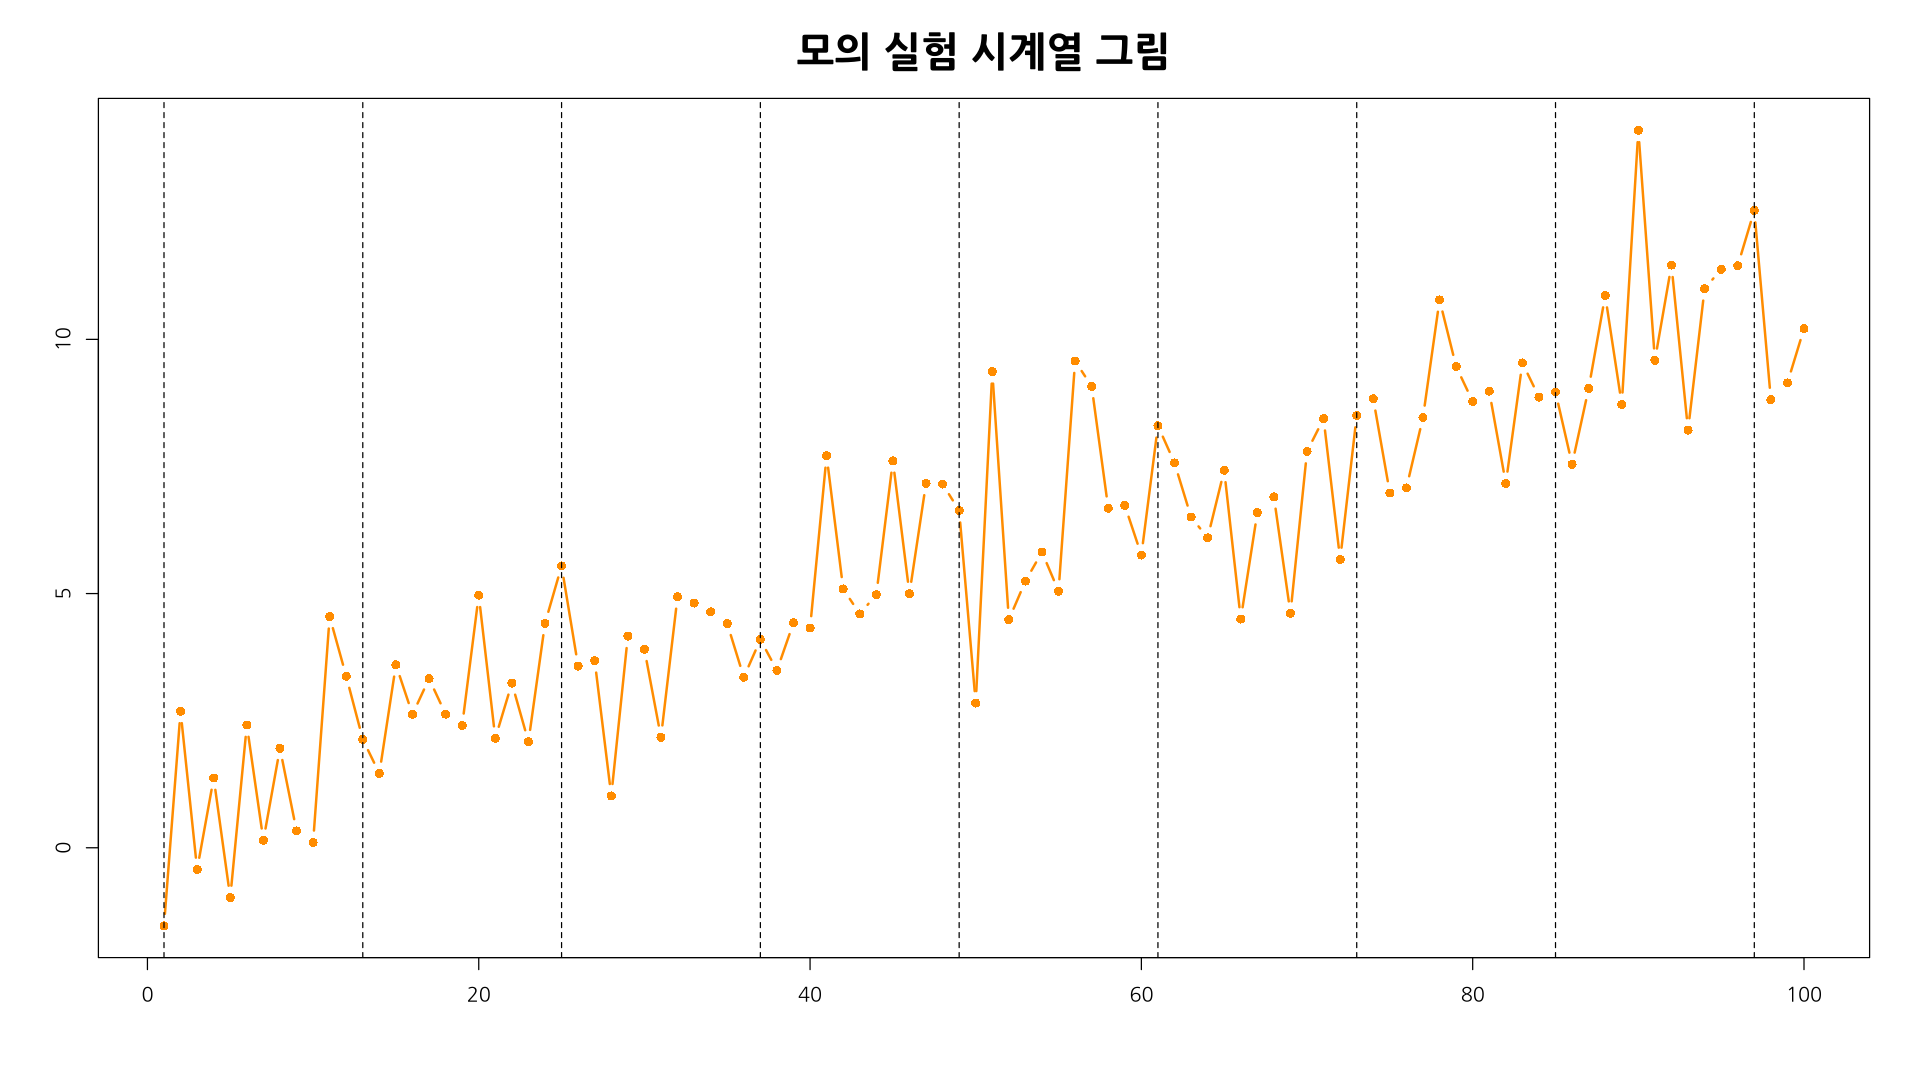

In [533]:
## 시계열 그림
plot(dt$t, dt$z, type = "b", col = 'darkorange', lwd = 2, xlab = "", ylab = "",
     main = "모의 실험 시계열 그림", cex.main = 2, pch = 16)
abline(v = seq(1, 120, by = 12), lty = 2) ## 계절성 판단

* **(1) 코드**

In [536]:
## 모형 적합
trend_model = lm(z~t, dt)
summary(trend_model)


Call:
lm(formula = z ~ t, data = dt)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0803 -1.0287  0.0169  0.8426  4.3288 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.818932   0.296301   2.764  0.00682 ** 
t           0.099619   0.005094  19.557  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.47 on 98 degrees of freedom
Multiple R-squared:  0.796,	Adjusted R-squared:  0.7939 
F-statistic: 382.5 on 1 and 98 DF,  p-value: < 2.2e-16


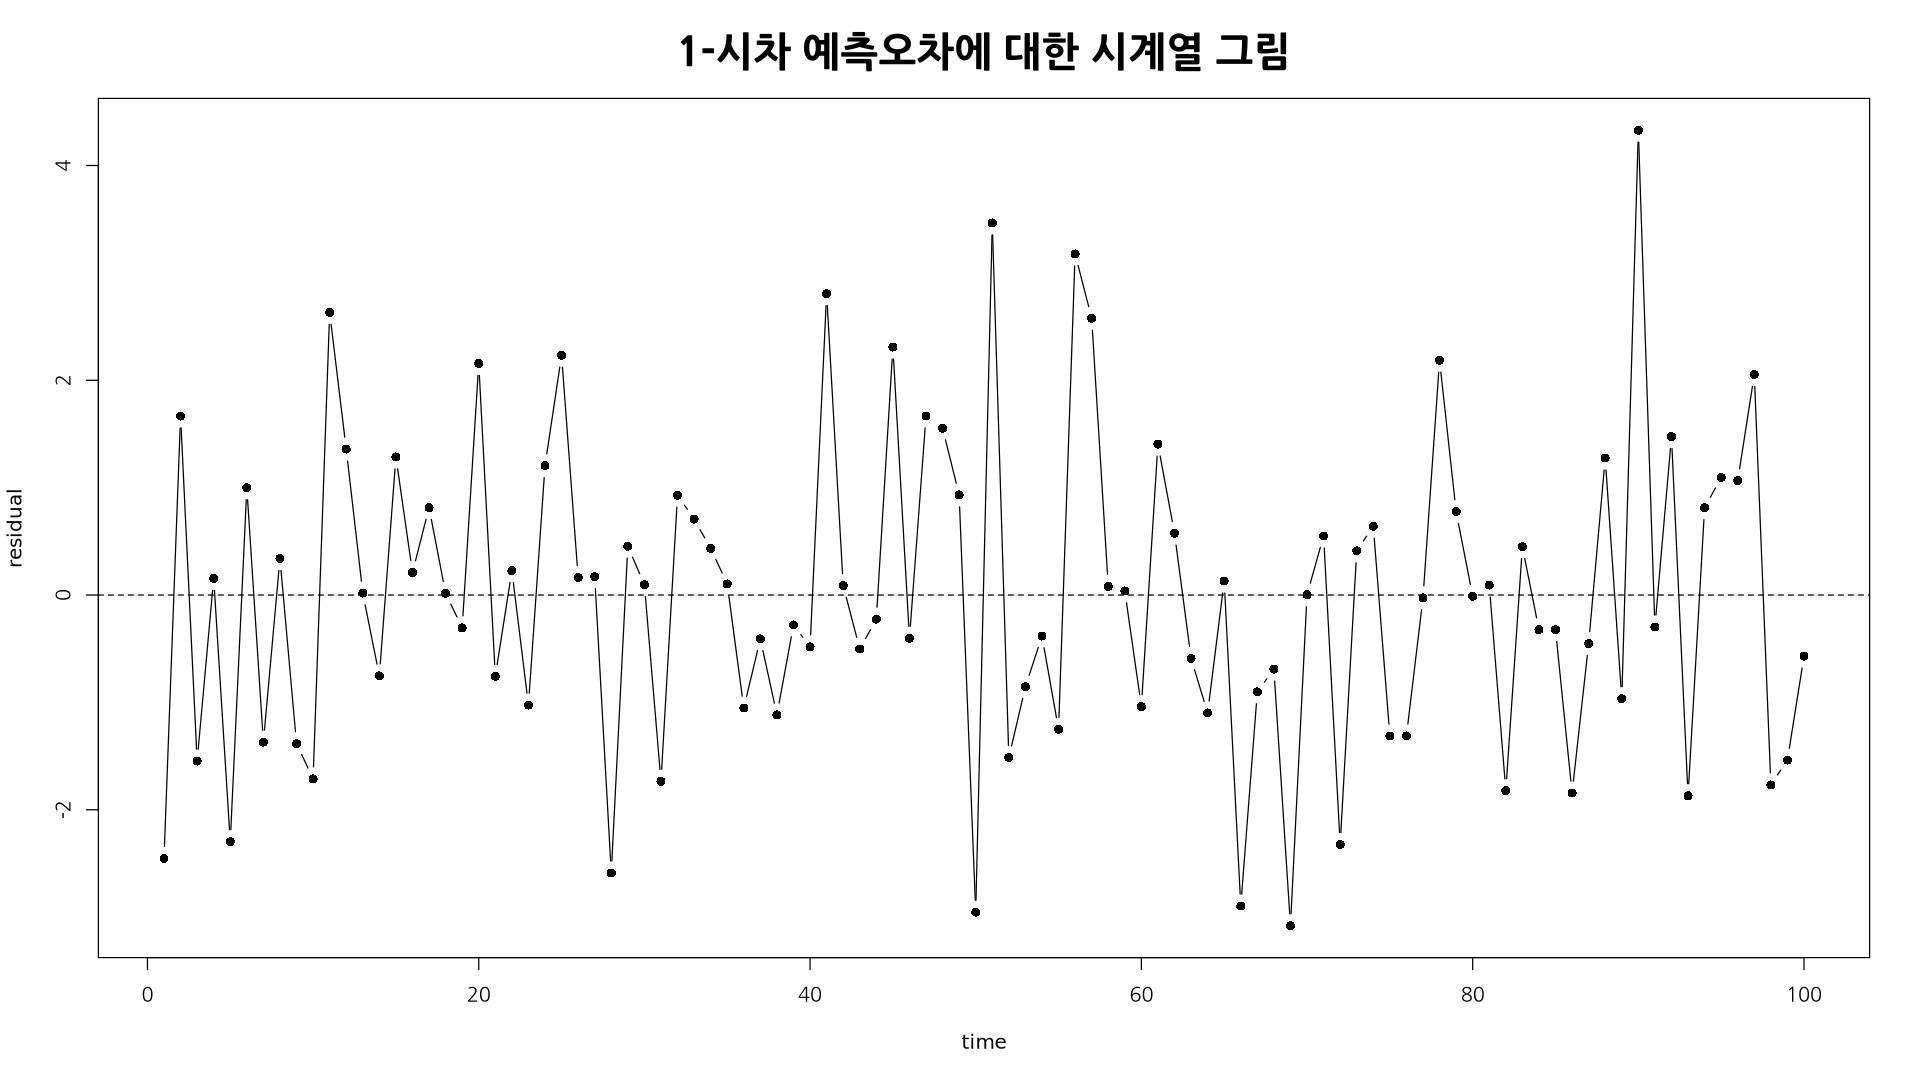

In [541]:
## 잔차 그림
plot(dt$t, resid(trend_model), type = 'b', pch = 16, xlab = 'time', ylab = 'residual',
     main = '1-시차 예측오차에 대한 시계열 그림', cex.main = 2)
abline(h = 0, lty = 2)
## 잔차 분석
dwtest(trend_model, alternative = "two.sided")
shapiro.test(resid(trend_model))
bptest(trend_model)


	Durbin-Watson test

data:  trend_model
DW = 2.2164, p-value = 0.3221
alternative hypothesis: true autocorrelation is not 0



	Shapiro-Wilk normality test

data:  resid(trend_model)
W = 0.98926, p-value = 0.6049



	studentized Breusch-Pagan test

data:  trend_model
BP = 0.28654, df = 1, p-value = 0.5924


In [ ]:
## data
export = ts(z, frequency = 12)
export

## feature engineering
df_export = data.frame(
    trend = 1:86, ## time
    month = as.factor(cycle(export)), ## month cycle
    export = z ## Z_t
)

df_export |> head()

## fitting
model_export = lm(export~0+trend+month, df_export)
summary(model_export)

new_data = data.frame(
    trend = 87:98,
    month = as.factor(c(3:12, 1:2))
)

round(predict(model_export, newdata = new_data), 3)